In [1]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import spatial
import glob
import math

%matplotlib inline

try:
    code_dir
except NameError:
    code_dir = os.getcwd()
    base_dir = code_dir.replace("/codes_local", "")
    root_dir = "/".join(base_dir.split("/")[:-1])
base_dir

'/media/pipkin/ROCKET-PRO/CD8_DEV_SC/5_Chd7_RNA_meta'

In [10]:
fc_file = root_dir + '/5_Chd7_shRNA_RNA/1_DEseq2_compiled/sep_Chd7_shRNAs/DESeq2_log2FoldChange.csv'
fc_df = pd.read_csv(fc_file, index_col=0)

use_cols = ['Chd7_1_vs_Ctrl', 'Chd7_2_vs_Ctrl', 'Chd7_3_vs_Ctrl']
fc_df = fc_df[use_cols]

In [14]:
Chd7KO_hm_file = root_dir + '/9_Figures/5_Chd7_RNA_meta/Chd7KO_vs_WT_log2fc_heatmap.csv'
Chd7KO_hm_df = pd.read_csv(Chd7KO_hm_file, index_col=0)

<AxesSubplot:ylabel='gene_name'>

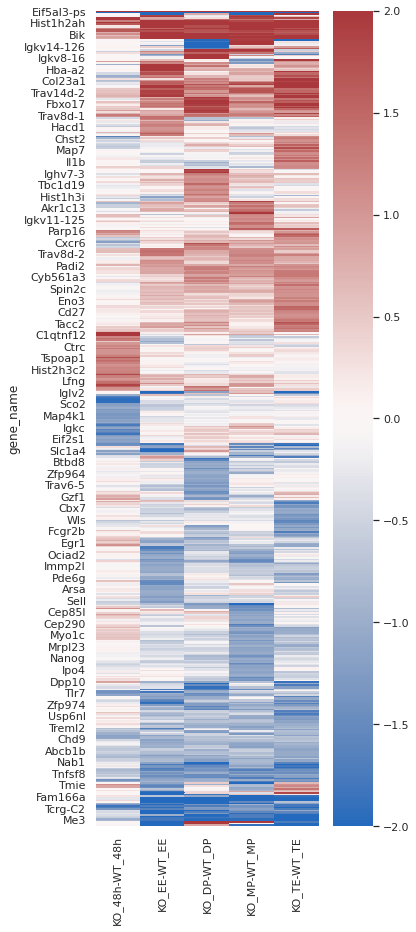

In [28]:
sns.set(rc={'figure.figsize':(5,15)}, style='white')
sns.heatmap(Chd7KO_hm_df, cmap='vlag', vmin=-2, vmax=2)

In [24]:
Chd7RNAi_hm_df = fc_df.loc[[x for x in Chd7KO_hm_df.index.tolist() if x in fc_df.index ]]

In [34]:
Chd7RNAi_hm_df = Chd7RNAi_hm_df.fillna(0)

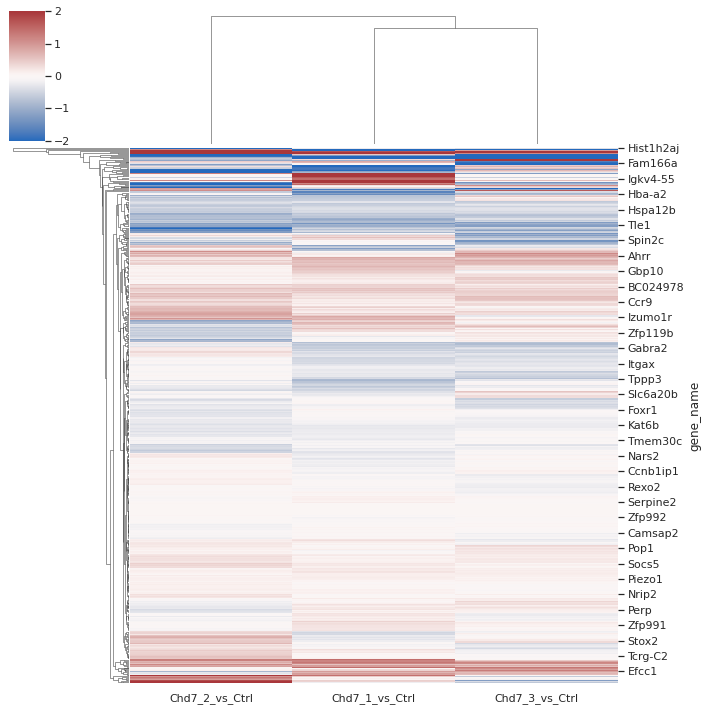

In [35]:
sns.clustermap(Chd7RNAi_hm_df , cmap='vlag', vmin=-2, vmax=2)